In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

In [ ]:
df = pd.read_csv('/content/gene_expression.csv')

In [ ]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
df.shape

(3000, 3)

In [ ]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

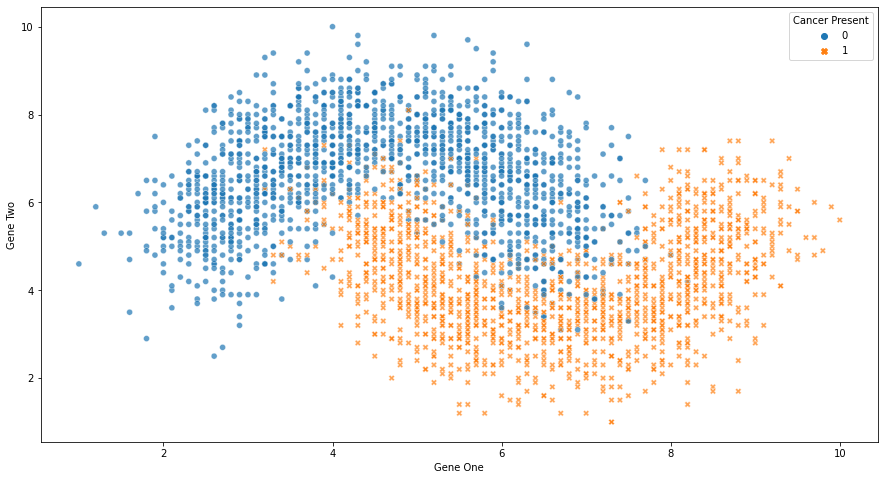

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.7,style='Cancer Present')

In [ ]:
sns.scatterplot(x=df[1],y=df[2],hue='Cancer Present',data=df,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(3,10)
#plt.legend(loc=(1.1,0.5))

(3.0, 10.0)

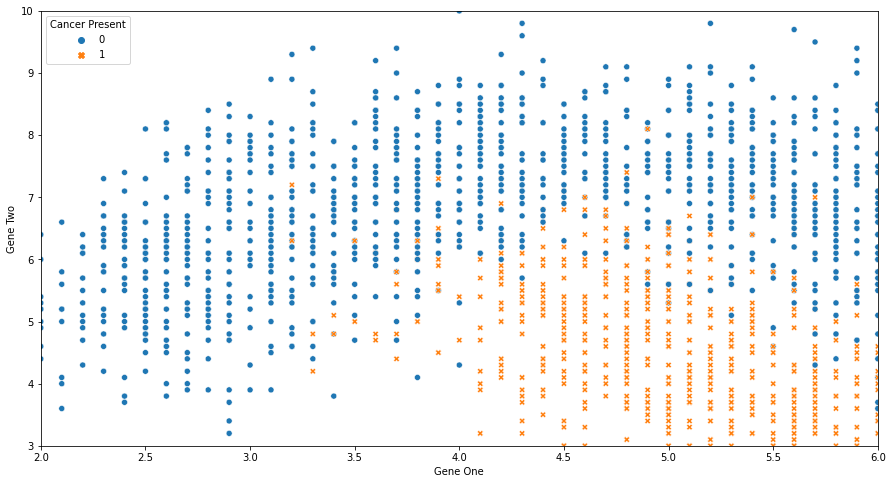

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(3,10)
#plt.legend(loc=(1.1,0.5))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train

array([[ 0.03459731,  2.3863981 ],
       [-0.2936603 , -0.23592591],
       [ 0.74582214, -0.46902138],
       ...,
       [-1.66140036,  0.57990822],
       [-0.67662752,  0.92955142],
       [-1.16901394,  1.22092076]])

In [ ]:
df1 = pd.DataFrame(data=scaled_X_train,columns=X_train.columns,index=X_train.index)

In [ ]:
df1

,Gene One,Gene Two
1927,0.034597,2.386398
550,-0.293660,-0.235926
2974,0.745822,-0.469021
445,0.691113,0.929551
849,-1.169014,1.628838
...,...,...
163,0.034597,1.046099
607,-0.621918,-0.818665
1916,-1.661400,0.579908
1667,-0.676628,0.929551


In [ ]:
X_train.head()

,Gene One,Gene Two
1927,5.7,9.5
550,5.1,5.0
2974,7.0,4.6
445,6.9,7.0
849,3.5,8.2


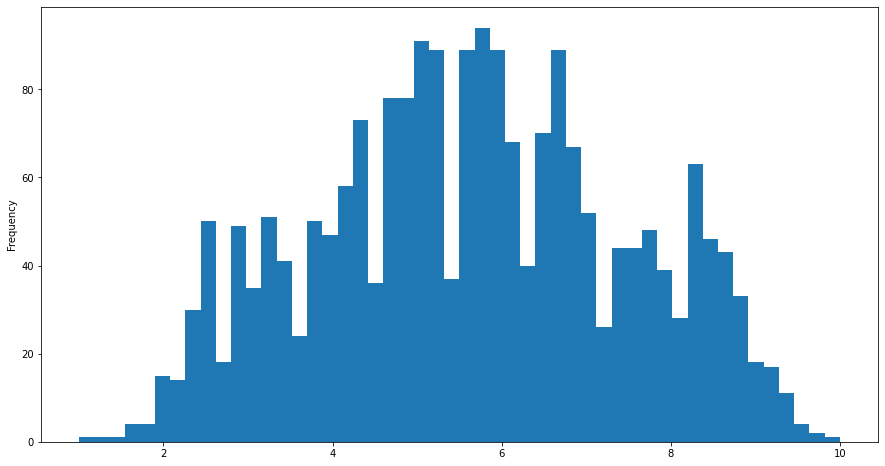

In [ ]:
X_train['Gene One'].plot(kind='hist',bins=50)

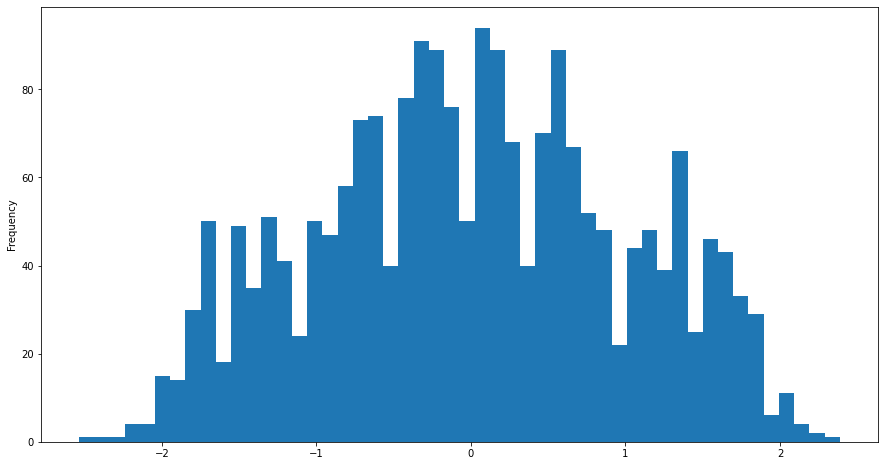

In [ ]:
df1['Gene One'].plot(kind='hist',bins=50)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=26)

In [ ]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

# MODEL EVALUATION

In [ ]:
y_pred = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
accuracy_score(y_test,y_pred)

0.9366666666666666

In [ ]:
confusion_matrix(y_test,y_pred)

array([[436,  26],
       [ 31, 407]])

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

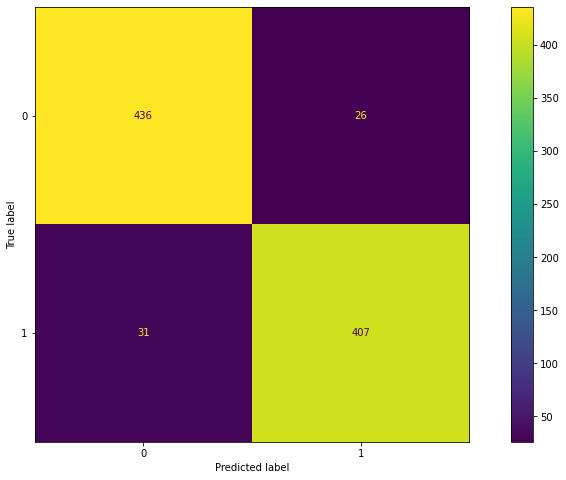

In [ ]:
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       462
           1       0.94      0.93      0.93       438

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [ ]:
acc = accuracy_score(y_test,y_pred)
err = 1-acc
print(f'hasil error rates {err}')
print(f'hasil accuracy score {acc}')


hasil error rates 0.07999999999999996
hasil accuracy score 0.92


In [ ]:
test_error_rates = []
train_acc_manhattan = []
test_acc_manhattan = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

    train_acc_manhattan.append(knn_model.score(scaled_X_train, y_train))
    test_acc_manhattan.append(knn_model.score(scaled_X_test, y_test))

In [ ]:
test_error_rates

[0.0888888888888889,
 0.08111111111111113,
 0.07777777777777772,
 0.0755555555555556,
 0.07222222222222219,
 0.07222222222222219,
 0.07444444444444442,
 0.07222222222222219,
 0.07111111111111112,
 0.06888888888888889,
 0.06777777777777783,
 0.06666666666666665,
 0.06555555555555559,
 0.06555555555555559,
 0.06666666666666665,
 0.06666666666666665,
 0.06555555555555559,
 0.06444444444444442,
 0.06555555555555559,
 0.06888888888888889,
 0.06777777777777783,
 0.06666666666666665,
 0.06666666666666665,
 0.06444444444444442,
 0.06444444444444442,
 0.06333333333333335,
 0.06555555555555559,
 0.06555555555555559,
 0.06888888888888889]

Text(0.5, 0, 'K Value')

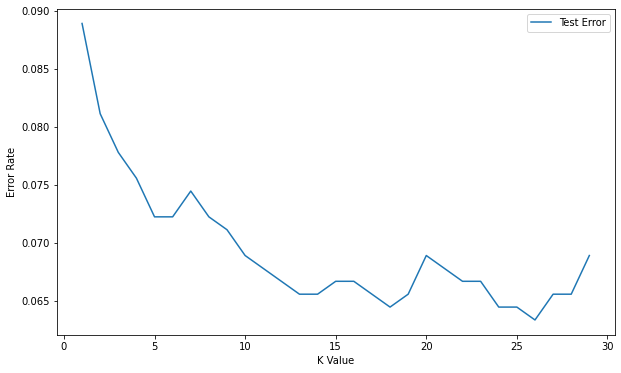

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

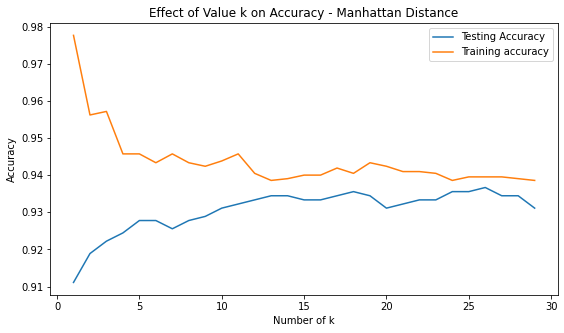

In [ ]:

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

plt.title('Effect of Value k on Accuracy - Manhattan Distance')
plt.plot(range(1, 30), test_acc_manhattan, label='Testing Accuracy')
plt.plot(range(1, 30), train_acc_manhattan, label='Training accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.show()

#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(scaled_X_train,y_train)

GaussianNB()

In [ ]:
df_result = X_train.copy()
df_result['prob_no'] =  nb.predict_proba(scaled_X_train)[:,0]
df_result['prob_yes'] =  nb.predict_proba(scaled_X_train)[:,1]
df_result.head()

,Gene One,Gene Two,prob_no,prob_yes
1927,5.7,9.5,0.998478,0.001522
550,5.1,5.0,0.444045,0.555955
2974,7.0,4.6,0.081721,0.918279
445,6.9,7.0,0.801157,0.198843
849,3.5,8.2,0.997850,0.002150


In [ ]:
df_knn = X_train.copy()
df_knn['prob_no'] =  knn_model.predict_proba(scaled_X_train)[:,0]
df_knn['prob_yes'] =  knn_model.predict_proba(scaled_X_train)[:,1]
df_knn.head()

,Gene One,Gene Two,prob_no,prob_yes
1927,5.7,9.5,1.000000,0.000000
550,5.1,5.0,0.034483,0.965517
2974,7.0,4.6,0.482759,0.517241
445,6.9,7.0,1.000000,0.000000
849,3.5,8.2,1.000000,0.000000


In [ ]:
y_pred_nb = nb.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred_nb)

0.8566666666666667

In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[393,  69],
       [ 60, 378]])

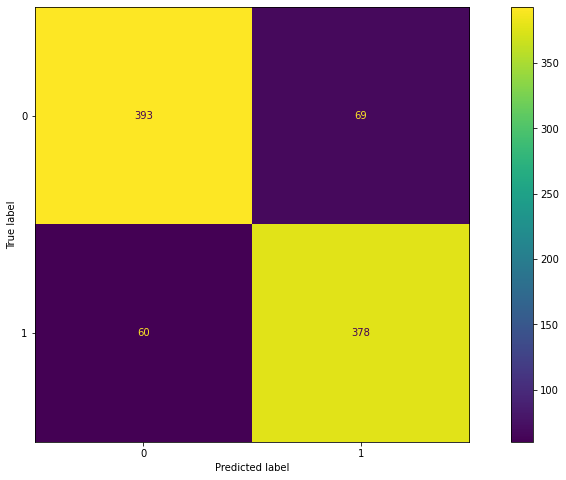

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       462
           1       0.85      0.86      0.85       438

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



In [ ]:
acc_nb = accuracy_score(y_test,y_pred_nb)
result = acc-acc_nb
print(f'hasil selisih accuracy score KNN dan Naive Bayes adalah {result}')

hasil selisih accuracy score KNN dan Naive Bayes adalah 0.06333333333333335


Bernoulli Naive bayes is good at handling boolean/binary attributes,while Multinomial Naive bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values. Consider three scenarios 

1)consider a datset which has columns like has_diabetes,has_bp,has_thyroid and then you classify the person as healthy or not.In such a scenario,Bernoulli NB will work well. 

2)consider a dataset that has marks of various students of various subjects and you want to predict,whether the student is clever or not.Then in this case multinomial NB will work fine. 

3)consider a dataset that has weight of students and you are predicting height of them,then GaussiaNB will well in this case

# Trining Time

In [ ]:
nb = GaussianNB()
%timeit nb.fit(scaled_X_train,y_train)

The slowest run took 8.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 1.83 ms per loop


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
%timeit knn_model.fit(scaled_X_train,y_train)

100 loops, best of 5: 1.94 ms per loop


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
%timeit logreg.fit(scaled_X_train,y_train)

100 loops, best of 5: 10.9 ms per loop


In [ ]:
%timeit y_pred_11 = knn_model.predict(scaled_X_test)

10 loops, best of 5: 67 ms per loop


In [ ]:
%timeit y_pred_logreg = logreg.predict(scaled_X_test)

The slowest run took 25.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 248 µs per loop


In [ ]:
%timeit y_pred_nb = nb.predict(scaled_X_test)

The slowest run took 7.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 418 µs per loop


In [ ]:
accuracy_score(y_test,y_pred_11)

NameError: ignored

In [ ]:
confusion_matrix(y_test,y_pred_11) # accuray n=11

In [ ]:
confusion_matrix(y_test,y_pred) # accuracy n=1